**DOMAIN PROJECT**

Domain yang dipilih untuk proyek machine learning ini adalah Keuangan, dengan judul Predictive Analytics : Predictive Analytics BRI Dividen.

**Latar Belakang**
Dalam berinvestasi di pasar saham, investor pada dasarnya memiliki banyak pilihan indeks yang bisa digunakan sebagai acuan perdagangan. Indeks saham adalah ukuran statistik perubahan gerak harga dari kumpulan saham yang dipilih berdasarkan kriteria tertentu dan digunakan sebagai sarana tujuan investasi. Banyaknya saham yang diterbitkan oleh banyak perusahaan, maka dibuatlah indeks saham ini untuk memantau kinerja sebuah bursa secara umum. 

Pergerakan saham BRI yang cukup signifikan dan besarnya keuntungan yang ditawarkan, ternyata menarik banyak masyarakat untuk berkecimpung dalam forex market. Forex market memiliki fungsi pokok dalam membantu kelancaran lalu lintas pembayaran internasional.

Forex termasuk investasi kategori high risk dengan kata lain beresiko tinggi karena transaksi yang kurang tepat sasarang dapat langsung mengikis modal deposito dalam sebuah akun dengan cepat. Oleh karena itu, para trader harus mengetahui kapan harus masuk, berapa lama menunggu dan berapa kali harus melakukan pembelian/penjualan. Salah satu cara yang dapat dilakukan adalah dengan menggunakan teknik forecasting.

Forecasting adalah suatu teknik untuk meramalkan keadaan dimasa yang akan datang dengan menggunakan data-data yang telah ada di masa lalu. Hal ini termasuk dalam time series forecasting, dengan mendeteksi pola dan kecenderungan data time series kemudian memformulasikannya dalam suatu model, maka dapat digunakan untuk memprediksi data yang akan datang.

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


# from sklearn.decomposition import PCA

# from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
# from sklearn.metrics import mean_squared_error
# from sklearn.impute import SimpleImputer

# from sklearn.svm import SVR
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor

In [5]:
df = pd.read_csv('BBRI.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-17,5075.0,5075.0,4960.0,4990.0,4736.246094,121231300
1,2023-04-18,4990.0,5025.0,4950.0,4950.0,4698.280273,95747700
2,2023-04-26,5150.0,5150.0,4930.0,5025.0,4769.466309,273336000
3,2023-04-27,4990.0,5150.0,4990.0,5150.0,4888.109863,125947200
4,2023-04-28,5175.0,5275.0,5100.0,5100.0,4840.651855,251912000
...,...,...,...,...,...,...,...
226,2024-04-01,6000.0,6025.0,5825.0,5925.0,5925.000000,217207800
227,2024-04-02,5850.0,5950.0,5625.0,5675.0,5675.000000,412180900
228,2024-04-03,5575.0,5675.0,5525.0,5625.0,5625.000000,333518700
229,2024-04-04,5650.0,5750.0,5650.0,5700.0,5700.000000,131936100


In [6]:
print(f'The data has {df.shape[0]} records and {df.shape[1]} columns.')

The data has 231 records and 7 columns.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       231 non-null    object 
 1   Open       231 non-null    float64
 2   High       231 non-null    float64
 3   Low        231 non-null    float64
 4   Close      231 non-null    float64
 5   Adj Close  231 non-null    float64
 6   Volume     231 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.8+ KB


**Exploratory Data Analysis**

1. Deskripsi variabel
Date : Tanggal pencatatan Data

*   Open : Harga buka dihitung perhari
*   High : Harga tertinggi perhari
*   Low : Harga terendah perhari
*   Close : Harga tutup dihitung perhari
*   Adj Close : Harga penutupan pada hari tersebut setelah disesuaikan dengan aksi korporasi seperti right issue, stock split atau stock reverse.
*   Volume : Volume transaksi


2. Pengecekan missing data

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
df.shape

(246, 7)

In [8]:
col_missing = [col for col in df.columns if df[col].isnull().sum()]
col_missing

[]

In [7]:
# imputer = SimpleImputer()
# df[col_missing] = imputer.fit_transform(df[col_missing])
# df.head()

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Explore Statistic Information**

In [8]:
# count adalah jumlah sampel pada data.
# mean adalah nilai rata-rata.
# std adalah standar deviasi.
# min adalah nilai minimum.
# 25% adalah kuartil pertama.
# 50% adalah kuartil kedua (nilai tengah).
# 75% adalah kuartil ketiga.
# max adalah nilai maksimum

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,4368.658537,4409.837398,4324.837398,4364.105691,4300.255921,1.572309e+08
std,199.894435,201.763587,189.800577,195.983686,243.098194,7.701155e+07
min,4010.000000,4090.000000,3960.000000,4040.000000,3895.575684,2.767650e+07
25%,4202.500000,4230.000000,4160.000000,4200.000000,4068.712402,1.040409e+08
50%,4345.000000,4400.000000,4305.000000,4350.000000,4304.590088,1.390178e+08
75%,4500.000000,4550.000000,4467.500000,4517.500000,4487.500000,1.885580e+08
max,4900.000000,4980.000000,4860.000000,4940.000000,4940.000000,5.616004e+08


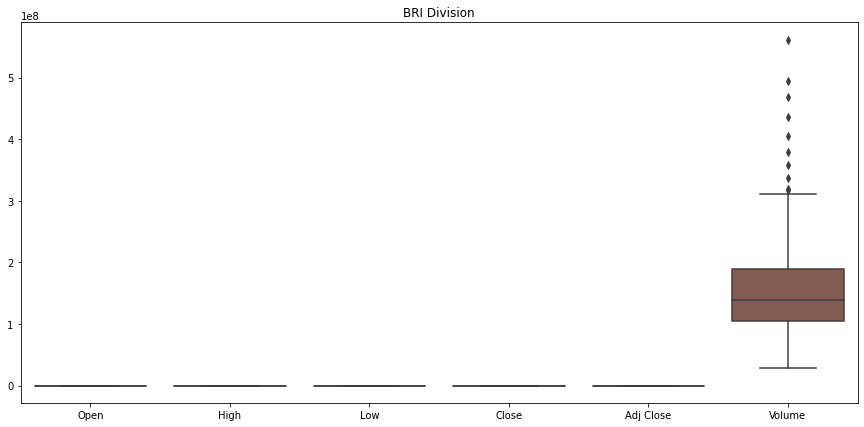

In [10]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64' or df[col].dtypes == 'int64']
plt.subplots(figsize=(15,7))
sns.boxplot(data=df[numerical_col]).set_title("BRI Division")
plt.show()

In [13]:
col = df.columns
df[col].dtypes =='int64'

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume        True
dtype: bool

In [15]:
Q1 = df.quantile(0.25)
#queartil 1
Q3 = df.quantile(0.75)
#quartil 3
IQR = Q3-Q1
#jarak = quartil1-quartil3

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
#df = df(lama) [ df(lama) < kuartil 1 - 1.5 * jarak ]
#df [df<100 | df >500]

df
# df.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11944\3228751103.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


,Date,Open,High,Low,Close,Adj Close,Volume
1,2021-10-22,4340.0,4400.0,4320.0,4400.0,4232.230469,160459300
2,2021-10-25,4330.0,4370.0,4300.0,4300.0,4136.043457,128240100
3,2021-10-26,4280.0,4370.0,4270.0,4350.0,4184.136719,108782400
4,2021-10-27,4330.0,4340.0,4260.0,4290.0,4126.424805,258038300
5,2021-10-28,4210.0,4300.0,4200.0,4240.0,4078.331055,159645200
...,...,...,...,...,...,...,...
241,2022-10-14,4380.0,4390.0,4270.0,4270.0,4270.000000,180841100
242,2022-10-17,4270.0,4320.0,4260.0,4300.0,4300.000000,145506000
243,2022-10-18,4280.0,4340.0,4280.0,4290.0,4290.000000,161444100
244,2022-10-19,4280.0,4340.0,4280.0,4300.0,4300.000000,81682300


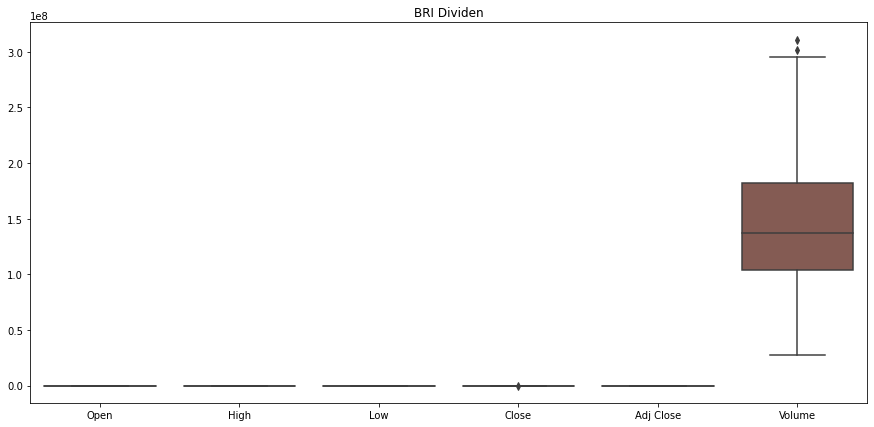

In [11]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64' or df[col].dtypes == 'int64']
plt.subplots(figsize=(15,7))
sns.boxplot(data=df[numerical_col]).set_title("BRI Dividen")
plt.show()

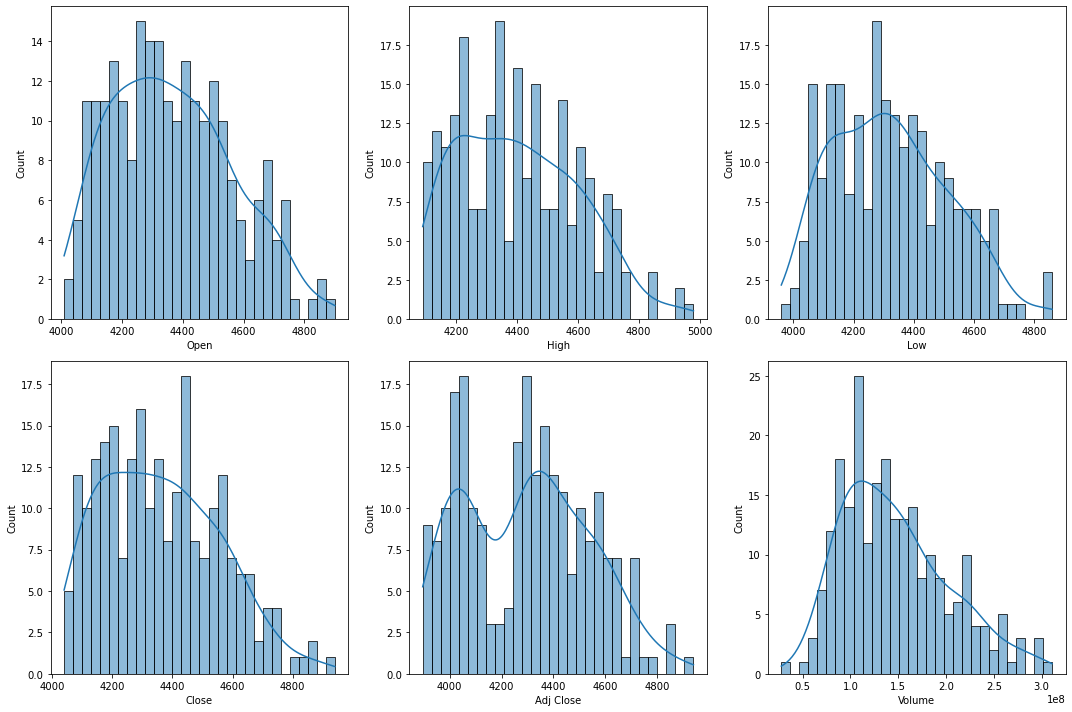

In [12]:
# Fitur yang diprediksi pada kasus ini adalah terfokus pada 'Adj Close'
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))
# ukuran figsize = 15 * 10


for i, col in enumerate(numerical_col):
    #                 0 , 0 , 1
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
    #df[col] diambil datanya perkolom
fig.tight_layout()
plt.show()

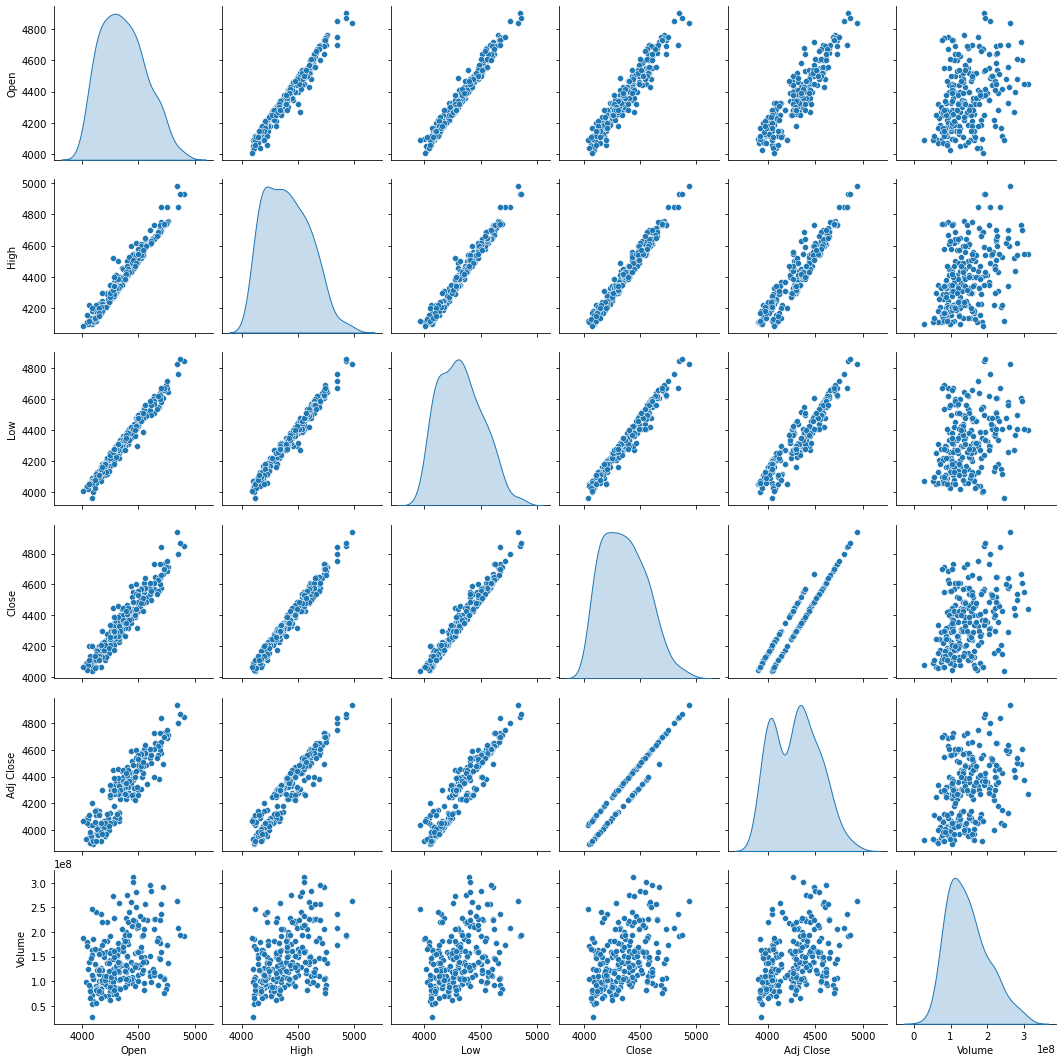

In [13]:
# Selanjutnya kita akan menganalisis korelasi fitur "Adj Close" terhadap fitur lain seperti "Open", "High", "Low", "Close" dan "Volume".
#  Dapat disimpulkan bahwa "Adj Close" memiliki korelasi positif yang kuat terhadap "Open", "High", "Low" dan "Close", 
# sedangkan untuk fitur "Volume" memiliki korelasi sedang terhadap fitur "Adj Close"
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()


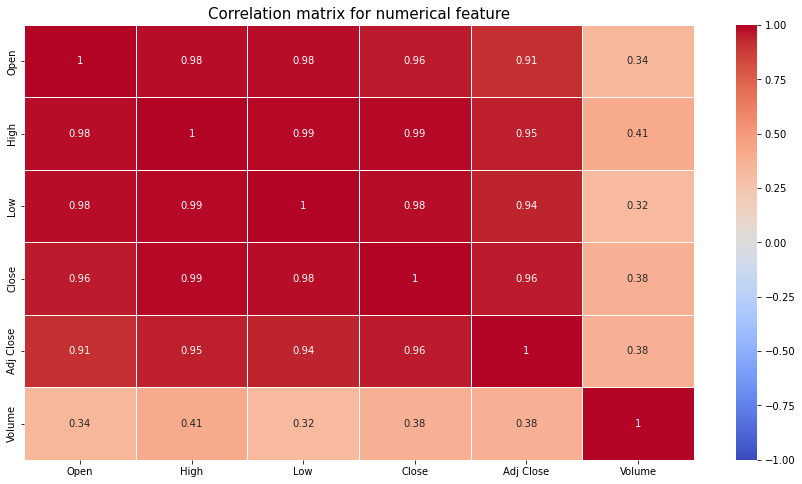

In [14]:
plt.figure(figsize=(15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

In [22]:
df = df.drop(['Date','Volume', 'Close'], axis=1)
df.head()

,Open,High,Low,Adj Close
0,4230.0,4250.0,4220.0,4087.949951
1,4230.0,4260.0,4210.0,4087.949951
2,4290.0,4300.0,4230.0,4087.949951
3,4270.0,4290.0,4210.0,4059.093750
4,4220.0,4220.0,4140.0,4001.381592


**Splitting Dataset**

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [19]:
print(len(X_train), 'records')
print(len(y_train), 'records')
print(len(X_test), 'records')
print(len(y_test), 'records')

196 records
196 records
50 records
50 records


**Data Normalization**

Untuk melakukan normalisasi data kita akan menggunakan library MinMaxScaler. Fungsi normalisasi pada data agar model lebih cepat dalam mempelajari data karena data telah diubah pada rentang tertentu seperti antara 0 dan 1

In [21]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [23]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['SVR', 'KNN', 'GradientBoosting'])

In [30]:
data = df.sort_index(ascending=True, axis=0)


In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM
df = pd.read_csv('BBRI.JK.csv')
data = df.sort_index(ascending=True, axis=0)

#membuat array data kosong dengan panjang index dari 0 - 246  , dengan 2 kolom
new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])


for i in range(0,len(df)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
#menjadikan data date sebagai index
date = pd.to_datetime(new_data['Date'])

new_data.index = date
new_data.set_index(pd.to_datetime(new_data['Date'].values) , inplace=True)
new_data.drop('Date' , axis=1 , inplace=True)

#mengahapus label date , karena data date akan dijadikan sebagai index
#new data masih berbentuk series dengan date sebagai index

# new data sudah berubah menjadi data frame 
# menjadikan dataset menjadi 2 dimensi degan 1 kolom
# print(dataset)

data_train = new_data[0:182]

data_test = new_data[182:]
# data_test


    

<function matplotlib.pyplot.show(close=None, block=None)>

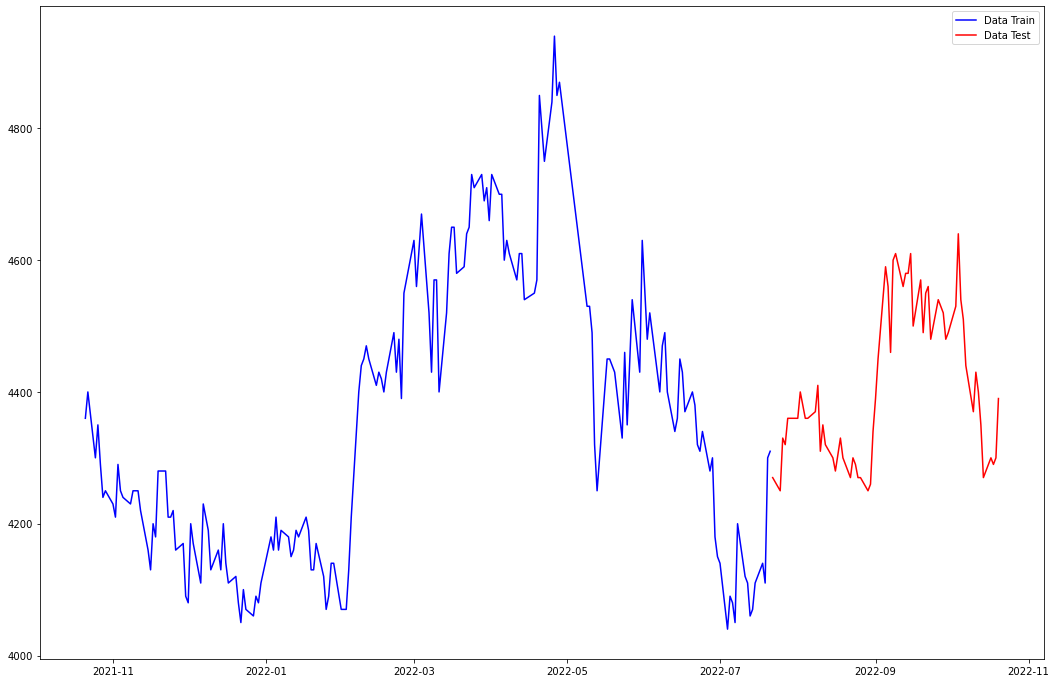

In [47]:
plt.figure(figsize=(18,12))
plt.plot(data_train['Close'],label='Data Train',color='b')
plt.plot(data_test['Close'],label='Data Test', color='r')
plt.legend()
plt.show

# plt.figure(figsize=(18,12))
# actual['Prediksi'] = closin_price
# plt.plot(train['Close'], label='valid') #182 data
# plt.plot(actual[['Close','Prediksi']] ,label='predict') #64 data dengan 2 kolom
# plt.legend()

In [6]:
# cara 2 memecah data
df = pd.read_csv('BBRI.JK.csv')
data = df.sort_index(ascending=True, axis=0)
#data= pd.to_datetime(data['Date'])

d = data[['Date']]
d = pd.to_datetime(d['Date'])
c = data[['Close']].values

new_datas = pd.DataFrame(c, index=d.values , columns=['Close'])
new_datas


#x= data.set_index('Date')
#print(x[['Close']])
#new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])

# for x in range(0,246):
#     new_data['Date'][x] = data['Date'][i]
# print(data['Date'][1])
# print(data['Date'][1])



,Close
2021-10-21,4360.0
2021-10-22,4400.0
2021-10-25,4300.0
2021-10-26,4350.0
2021-10-27,4290.0
...,...
2022-10-14,4270.0
2022-10-17,4300.0
2022-10-18,4290.0
2022-10-19,4300.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

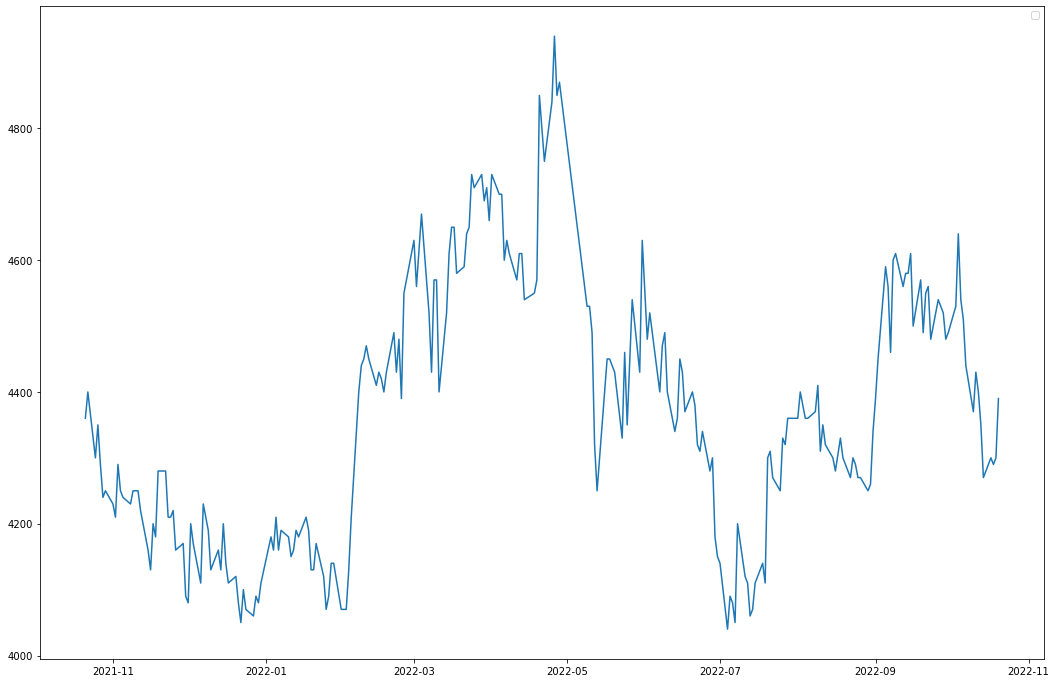

In [340]:
#grafik awal data
plt.figure(figsize=(18,12))
plt.plot(new_datas)
plt.legend()
plt.show

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data[0:])


X_train , y_train = [] ,[]

for i in range(60 , len(data_train)) :
              #(60,182)
    # dimulai dari data idx ke 60 yang berisi history data dari (0-60)
    # berakhri di data idx ke 182 yang berisi history data dari (60-181)
    #append data-skala[0:60,0] --> [baris_start:baris_end , kolom_ke] , data akan berjumlah 64 baris , dengan tiap baris memiliki 60 kolom menyamping
    X_train.append(scaled_data[i-60: i , 0])
#                                 0:60,0
#                                 1:61,0
#                                 2:62,0
#                                 122:182,0
    #data akan memiliki 64 baris , dengan  tiap baris memiliki 1 kolom
    y_train.append(scaled_data[i,0])
#                  0,0
#                  1,0

X_train = np.array(X_train)
y_train = np.array(y_train)
#d =X_train.reshape(7320,1)
#print(y_train.shape)

X_train = np.reshape(X_train , (X_train.shape[0], X_train.shape[1] ,1))
X_train
# membagi data dari index ke 1 - 122 menjadi 60 baris , 1 kolom , jadi tiap baris memiliki 60 data
#data di reshape kebentuk 1 kolom berjajar kebawah  agar mudah di train
  


array([[[0.35555556],
        [0.4       ],
        [0.28888889],
        ...,
        [0.12222222],
        [0.13333333],
        [0.16666667]],

       [[0.4       ],
        [0.28888889],
        [0.34444444],
        ...,
        [0.13333333],
        [0.16666667],
        [0.15555556]],

       [[0.28888889],
        [0.34444444],
        [0.27777778],
        ...,
        [0.16666667],
        [0.15555556],
        [0.18888889]],

       ...,

       [[0.63333333],
        [0.63333333],
        [0.55555556],
        ...,
        [0.03333333],
        [0.07777778],
        [0.11111111]],

       [[0.63333333],
        [0.55555556],
        [0.56666667],
        ...,
        [0.07777778],
        [0.11111111],
        [0.07777778]],

       [[0.55555556],
        [0.56666667],
        [0.58888889],
        ...,
        [0.11111111],
        [0.07777778],
        [0.28888889]]])

In [41]:
#melatih data training 

from sklearn.metrics import mean_squared_error

model = Sequential()
#units = sebagai hiden layer yaitu 50 units
#input shape = input dari data yaitu 60 baris , 1 kolom
#danse artinya output yaitu ada 1 layer
#epochs artinya iterasi yaitu setiap data bakal di latih dengan jumlah batch size
#batch size = jumlah sampel yang ditraining pada tiap epoch
model.add(LSTM(units=75, return_sequences=True , input_shape=(X_train.shape[1],1))) #danse layer 1
model.add(LSTM(units=75)) #danse layer 2
model.add(Dense(1)) #output layer

model.compile(loss='mean_absolute_error' , optimizer='adam')
model.fit(X_train, y_train , epochs=100 , batch_size=1)

#hasil dari training data dengan menggunakan 100 iterasi dan dengan batch size =1 yaitu didapatkan loss sebesar 0.0656

Epoch 1/100
122/122 [==============================] - 19s 74ms/step - loss: 0.1705
Epoch 2/100
122/122 [==============================] - 9s 72ms/step - loss: 0.1145
Epoch 3/100
122/122 [==============================] - 9s 74ms/step - loss: 0.1085
Epoch 4/100
122/122 [==============================] - 9s 72ms/step - loss: 0.0972
Epoch 5/100
122/122 [==============================] - 9s 73ms/step - loss: 0.0934
Epoch 6/100
122/122 [==============================] - 9s 73ms/step - loss: 0.0902
Epoch 7/100
122/122 [==============================] - 9s 73ms/step - loss: 0.0832
Epoch 8/100
122/122 [==============================] - 9s 73ms/step - loss: 0.0838
Epoch 9/100
122/122 [==============================] - 9s 72ms/step - loss: 0.0817
Epoch 10/100
122/122 [==============================] - 9s 72ms/step - loss: 0.0795
Epoch 11/100
122/122 [==============================] - 9s 72ms/step - loss: 0.0761
Epoch 12/100
122/122 [==============================] - 9s 72ms/step - loss: 0.0762


122/122 [==============================] - 10s 81ms/step - loss: 0.0613
Epoch 99/100
122/122 [==============================] - 10s 83ms/step - loss: 0.0618
Epoch 100/100
122/122 [==============================] - 10s 78ms/step - loss: 0.0635


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape [1], 1)))
model.add(LSTM(units = 50, return_sequences = True)) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, epochs = 200, batch_size = 8)

Epoch 1/200
16/16 [==============================] - 15s 123ms/step - loss: 0.2870
Epoch 2/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2381
Epoch 3/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2242
Epoch 4/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2138
Epoch 5/200
16/16 [==============================] - 2s 123ms/step - loss: 0.2139
Epoch 6/200
16/16 [==============================] - 2s 123ms/step - loss: 0.2072
Epoch 7/200
16/16 [==============================] - 2s 121ms/step - loss: 0.2075
Epoch 8/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2143
Epoch 9/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2099
Epoch 10/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2059
Epoch 11/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2077
Epoch 12/200
16/16 [==============================] - 2s 118ms/step - loss: 0.2057
Epoch 13/200

16/16 [==============================] - 2s 119ms/step - loss: 0.1985
Epoch 100/200
16/16 [==============================] - 2s 121ms/step - loss: 0.1973
Epoch 101/200
16/16 [==============================] - 2s 119ms/step - loss: 0.2004
Epoch 102/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1978
Epoch 103/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1981
Epoch 104/200
16/16 [==============================] - 2s 121ms/step - loss: 0.1984
Epoch 105/200
16/16 [==============================] - 2s 122ms/step - loss: 0.2009
Epoch 106/200
16/16 [==============================] - 2s 122ms/step - loss: 0.1971
Epoch 107/200
16/16 [==============================] - 2s 120ms/step - loss: 0.2018
Epoch 108/200
16/16 [==============================] - 2s 121ms/step - loss: 0.2042
Epoch 109/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1985
Epoch 110/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1976
Epoch 

16/16 [==============================] - 2s 122ms/step - loss: 0.1966
Epoch 197/200
16/16 [==============================] - 2s 123ms/step - loss: 0.1979
Epoch 198/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1968
Epoch 199/200
16/16 [==============================] - 2s 121ms/step - loss: 0.1976
Epoch 200/200
16/16 [==============================] - 2s 119ms/step - loss: 0.1967


In [42]:
#mempersiapkan data test

#ukuranya 124 ,1 
#karena data yang ditrain berakhir di index 182 maka data yang akan di test dimulai dari index ke 182
inputs = new_data[len(new_data)- len(data_test) - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

#246 - 64(panjang data test) = 182 - 60(waktu kebelakang) = 122 
#berarti data time digunakan adalah data dari index 122
#124 baris selanjutnya berarti 122+ 124 = 246

#maka bentuk dari permodelan tersebut
            #122- 182 
            #123-183
            #....
            #186-246       
            #60 , 124
x_test = []
for i in range(60 , inputs.shape[0]) :
    
    # data dimulai dari baris ke 182 berisi history data data dari [122:182]
    # data test berakhir hingga index ke 245 berisi history data dari [186:246]
    x_test.append(inputs[i-60:i ,0])
    #inputs[0:60,0]
    #berisi data dari baris ke 122 - 182
    
    #inputs[1:61,0]
    #berisi data baris ke 123 -183
    #....
    #inputs[60-124,0] berisi baris ke 186-246 
    #print(i-60 , i)
    
X_test = np.array(x_test)   

#246-64-60 = 122 baris
#print(X_test.shape)
x_test = np.reshape(X_test , (X_test.shape[0], X_test.shape[1],1))
# membagi data dari index ke 1 - 124 menjadi 60 baris , dalam format 1 kolom berjejer ke bawah
#print(x_test)
#membagi data berdasarkan index
x_test.shape

closing_price = model.predict(x_test)

closin_price = scaler.inverse_transform(closing_price)
print(closin_price)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 3s 69ms/step
[[4270.0723]
 [4264.8896]
 [4255.769 ]
 [4316.019 ]
 [4293.576 ]
 [4333.2456]
 [4328.228 ]
 [4335.7397]
 [4361.475 ]
 [4352.433 ]
 [4344.475 ]
 [4340.1206]
 [4340.386 ]
 [4359.471 ]
 [4309.3076]
 [4320.6304]
 [4294.5938]
 [4276.777 ]
 [4254.5586]
 [4266.0557]
 [4249.779 ]
 [4231.7393]
 [4237.722 ]
 [4231.4473]
 [4220.1553]
 [4216.1606]
 [4202.7188]
 [4203.4004]
 [4242.291 ]
 [4281.7974]
 [4341.3643]
 [4461.735 ]
 [4509.6475]
 [4476.0786]
 [4558.567 ]
 [4576.233 ]
 [4554.236 ]
 [4559.931 ]
 [4551.9683]
 [4568.704 ]
 [4499.911 ]
 [4543.1523]
 [4484.2217]
 [4527.214 ]
 [4526.472 ]
 [4498.234 ]
 [4523.993 ]
 [4520.898 ]
 [4520.8   ]
 [4500.0586]
 [4496.814 ]
 [4511.1826]
 [4572.2227]
 [4551.0205]
 [4532.8687]
 [4483.125 ]
 [4422.4917]
 [4431.0215]
 [4395.811 ]
 [4364.3135]
 [4308.834 ]
 [4296.1973]
 [4267.602 ]
 [4254.197 ]]


In [43]:
train = new_data[:182]
actual = new_data[182:]
#print(train.shape)
actual['Prediksi'] = closin_price
print(actual)
#artinya dari model tersebut memprediksi 64 baris kedepan dengan menggunakan 60 baris kebelakang

             Close     Prediksi
2022-07-22  4270.0  4270.072266
2022-07-25  4250.0  4264.889648
2022-07-26  4330.0  4255.769043
2022-07-27  4320.0  4316.019043
2022-07-28  4360.0  4293.576172
...            ...          ...
2022-10-14  4270.0  4364.313477
2022-10-17  4300.0  4308.833984
2022-10-18  4290.0  4296.197266
2022-10-19  4300.0  4267.602051
2022-10-20  4390.0  4254.196777

[64 rows x 2 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1208\2061554327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Prediksi'] = closin_price


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1208\973515010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Prediksi'] = closin_price


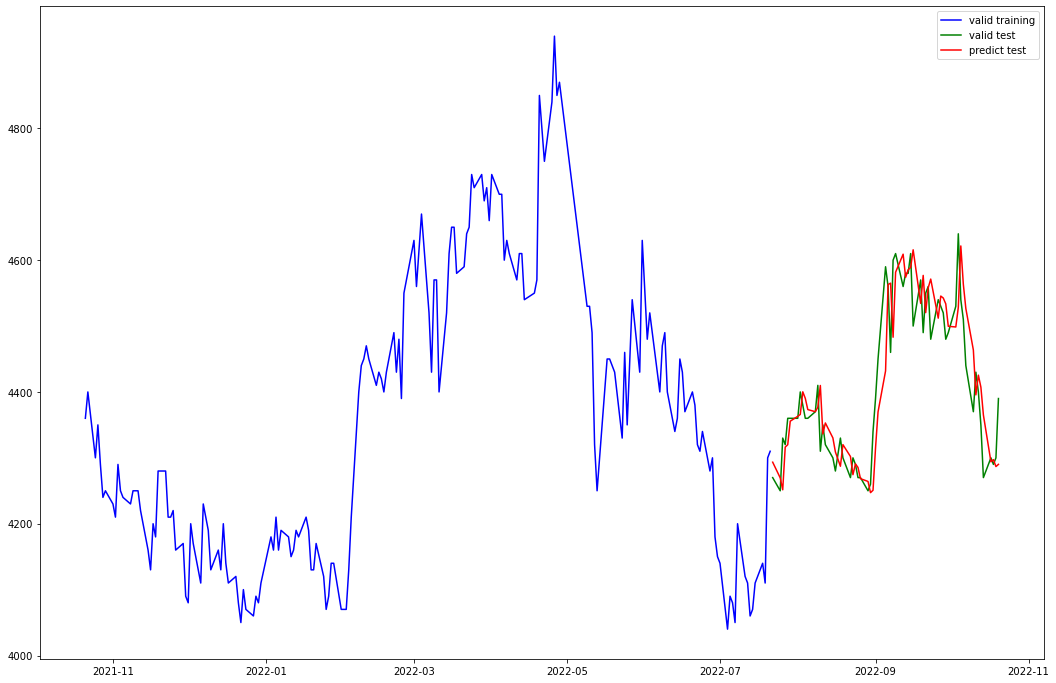

In [39]:
train = new_data[:182]
actual = new_data[182:]

plt.figure(figsize=(18,12))
actual['Prediksi'] = closin_price
plt.plot(train['Close'], label='valid training', color='b') #182 data
plt.plot(actual[['Close']] ,label='valid test' , color='g') #64 data dengan 2 kolom
plt.plot(actual[['Prediksi']] ,label='predict test' , color='r')
plt.legend()
#warna ijo prediksi
#warna biru dan orangge = data asli 

In [ ]:
#grafik berwarna biru menunjukan data actula hingga pertengahan juli 2022
#grafik orange menunjukan data actual yang akan digunakan untuk membadingkan hasil prediksi
#grafik hijau merupakan data hasil prediksi 
#pada grafik diatas , dapat dilihat bahwa model yang telah dibuat , hampir dapat memprediksi data dengan tepat , walaupun belum sempurna


In [44]:
new_data

,Close
2021-10-21,4360.0
2021-10-22,4400.0
2021-10-25,4300.0
2021-10-26,4350.0
2021-10-27,4290.0
...,...
2022-10-14,4270.0
2022-10-17,4300.0
2022-10-18,4290.0
2022-10-19,4300.0


In [49]:
a= (new_data.index)
a
#test = pd.DataFrame(index=new_data.index + 100 , columns=['close'])

DatetimeIndex(['2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01',
               '2021-11-02', '2021-11-03',
               ...
               '2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20'],
              dtype='datetime64[ns]', length=246, freq=None)

In [55]:
dataBaru = pd.DataFrame(index=['2022-10-21', '2022-10-22','2022-10-23','2022-10-24','2022-10-25','2022-10-26','2022-10-27','2022-10-28'],columns=['Close'])

2/2 [==============================] - 0s 84ms/step


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1208\2678595434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Prediksi'] = closing_price


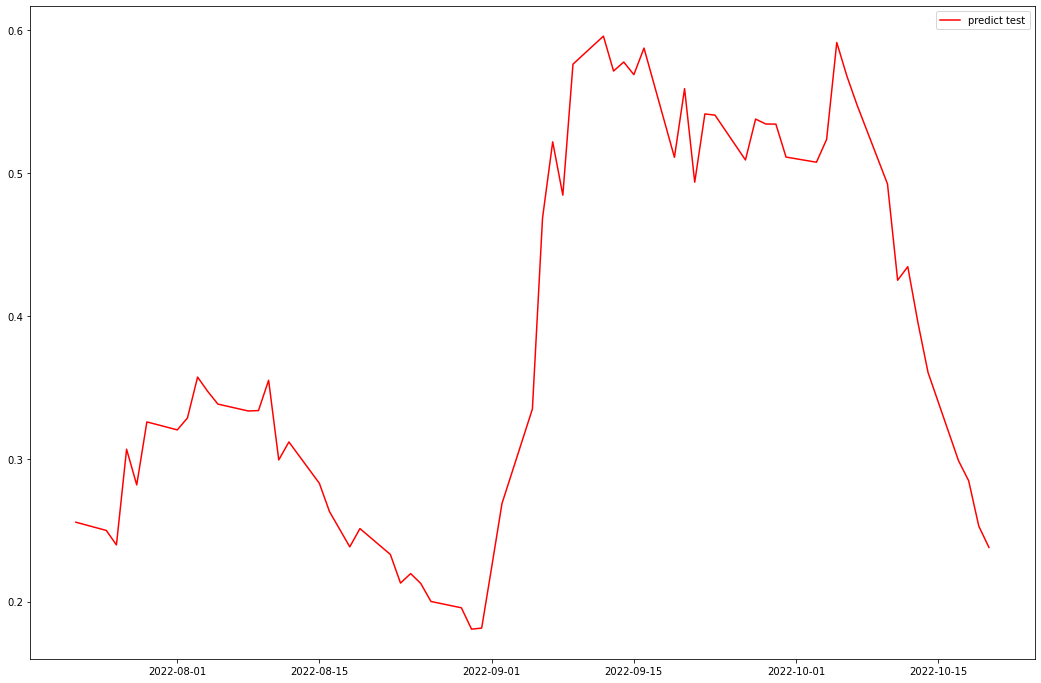

In [58]:
closing_price = model.predict(x_test)
closing_price

plt.figure(figsize=(18,12))
actual['Prediksi'] = closing_price
# plt.plot(train['Close'], label='valid training', color='b') #182 data
# plt.plot(actual[['Close']] ,label='valid test' , color='g') #64 data dengan 2 kolom
plt.plot(actual[['Prediksi']] ,label='predict test' , color='r')
plt.legend()